**<h1>UJIAN AKHIR SEMESTER KECERDASAN BUATAN**

<h4>Nama : Tri Shena Orivia Pasin
<h4>NIM  : 09011181823029
<h4>Kelas : SK5A Indralaya

**<h1> DATA HARGA ALPUKAT MENGGUNAKAN K-MEANS CLUSTERING**

[Dataset](https://www.kaggle.com/neuromusic/avocado-prices)



**Langkah 1: Input Libraries**

In [ ]:
import pandas as pd #untuk membaca dan menulis spreadsheet
import numpy as np #untuk melakukan perhitungan yang efisien
import matplotlib.pyplot as plt #untuk visualisasi data
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

**Langkah 2: Menginput Data**

In [ ]:
alpukat = pd.read_csv("avocado.csv")
alpukat.head()

,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


**Langkah 3: Menghilangkan kolom yang tidak diperlukan**

In [ ]:
alpukat = alpukat.drop(["Date", "4046","4225", "4770", "Small Bags", "Large Bags", "XLarge Bags", "type", "year", "region"], axis = 1)
alpukat.head()

,AveragePrice,Total_Volume,Total_Bags
0,1.33,64236.62,8696.87
1,1.35,54876.98,9505.56
2,0.93,118220.22,8145.35
3,1.08,78992.15,5811.16
4,1.28,51039.60,6183.95


In [ ]:
#Menentukan variabel yang akan di klusterkan
alpukat_x = alpukat.iloc[:, 1:3]
alpukat_x.head()

,Total_Volume,Total_Bags
0,64236.62,8696.87
1,54876.98,9505.56
2,118220.22,8145.35
3,78992.15,5811.16
4,51039.60,6183.95


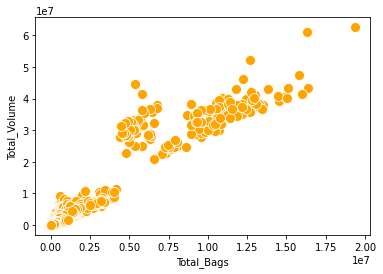

In [ ]:
#Memvisualkan persebaran data
sns.scatterplot(x="Total_Bags", y="Total_Volume", data=alpukat, s=100, color="orange", alpha = 1)

**Langkah 4 : Menentukan Nilai K**

In [ ]:
#Mengubah variabel data frame menjadi array
x_array =  np.array(alpukat_x)
print(x_array)

[[ 64236.62   8696.87]
 [ 54876.98   9505.56]
 [118220.22   8145.35]
 ...
 [ 13766.76   9394.11]
 [ 16205.22  10969.54]
 [ 17489.58  12014.15]]


In [ ]:
#Menstandarkan ukuran variabel 
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.00102634, 0.00044891],
       [0.0008766 , 0.00049066],
       [0.00189   , 0.00042045],
       ...,
       [0.0002189 , 0.0004849 ],
       [0.00025791, 0.00056622],
       [0.00027846, 0.00062014]])

In [ ]:
#Menentukan dan mengkonfigurasi fungsi kmeans
kmeans = KMeans(n_clusters = 3, random_state=123)
#Menentukan kluster dari data
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [ ]:
#Menampilkan pusat cluster
print(kmeans.cluster_centers_)

[[0.00395016 0.00371653]
 [0.53971124 0.47439369]
 [0.07180254 0.06576449]]


In [ ]:
#Menampilkan Hasil Kluster
print(kmeans.labels_)
#Menambahkan Kolom "kluster" Dalam Data Frame Driver
alpukat["Kluster"] = kmeans.labels_
alpukat.head()

[0 0 0 ... 0 0 0]


,AveragePrice,Total_Volume,Total_Bags,Kluster
0,1.33,64236.62,8696.87,0
1,1.35,54876.98,9505.56,0
2,0.93,118220.22,8145.35,0
3,1.08,78992.15,5811.16,0
4,1.28,51039.60,6183.95,0


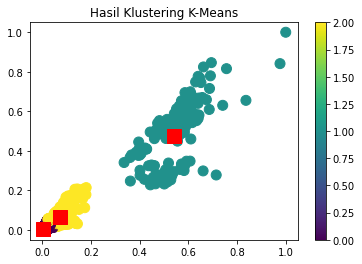

In [ ]:
#Memvisualkan hasil kluster
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = alpukat.Kluster, marker = "o", alpha = 1,)

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="s");

plt.title("Hasil Klustering K-Means")
plt.colorbar(output)

plt.show()